<a href="https://colab.research.google.com/github/sakeefkarim/intro_quantitative_sociology/blob/main/data/week%2012/SOCI269_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://collegeaim.org/wp-content/uploads/2021/09/Amherst.png" alt="Amherst Logo" width="200"/>


# An Introduction to Plotting in `Python` <img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png" alt="Python logo" width="30">

[Sakeef M. Karim](https://www.sakeefkarim.com/)

skarim@amherst.edu

## Setting the Stage

This notebook provides a _high-level_ overview of how to generate basic charts—from scatterplots to heatmaps—using the [`seaborn`](https://seaborn.pydata.org/) and [`plotnine`](https://plotnine.readthedocs.io/en/stable/) libraries in Python. Along the way, we’ll be using methods from [`pandas`](https://pandas.pydata.org/), [`matplotlib`](https://matplotlib.org/) and cognate libraries to modify our data, customize our plotting aesthetics and export our visualizations.


## Preliminaries

Let's import a few *essential* libraries (e.g., `pandas` for data wrangling) and submodules (e.g., `seaborn.objects` from `seaborn`) to visualize data in `Python`.

In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns
import seaborn.objects as so

Once again, we can _mount_ our Google Drive folders onto a Colab session to save plots, data sets and so on. To programmatically mount your Drive folder(s), run the following lines:

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Data

For this session, we'll be ***mostly*** playing around with data from [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/)—a popular package for exploring, manipulating and visualizing data in `R`.

We can import the `palmerpenguins` library into `Python` through a variety of channels. To make things easy, let's simply *install* the `Python` version of `palmerpenguins`:

In [ ]:
# Note: `penguins` is automatically available via seaborn---but the *year* variable is missing
# sns.load_dataset('penguins')

!pip install palmerpenguins

from palmerpenguins import load_penguins

penguins = load_penguins()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We will also draw on `gapminder` for a few examples. Once again, let's keep things simple by installing the `Python` version of the dataset.

In [ ]:
!pip install gapminder

from gapminder import gapminder

gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Saving Plots

To make matters easier, create a `Plots` subfolder within `/Colab Notebooks`. The code interspersed in the sections to follow assumes that you have a `/Colab Notebooks/Plots` subdirectory within Google Drive.

# `plotnine`

The [`plotnine`](https://plotnine.readthedocs.io/en/stable/) library allows `Python` users to work with a bare-bones version of the `ggplot2` library. In lieu of providing exhaustive examples,<a name='cite_ref-1'></a>[<sup>[1]</sup>](#cite_note-1)  I'll  walk through some basic plotting options: i.e., scatterplots, barplots and line plots.

## Scatterplots

In [ ]:
from plotnine import *


gg_p1 = (
          ggplot(penguins, aes(x = 'body_mass_g', y = 'bill_length_mm', colour = 'species')) +
          geom_point(size = 4, alpha = 0.5) +
          theme_minimal() +
          theme(legend_position = 'top',
                axis_title = element_text(size = 12)) +
          labs(x = 'Body Mass (g)', y = 'Bill Length (mm)', colour = '') +
          scale_colour_brewer(type = 'qual', palette = 'Dark2')
          )

# Adding facets

gg_p1 + facet_wrap('~year')

# Saving

ggsave(gg_p1, '/drive/My Drive/Colab Notebooks/Plots/ggplot_example.jpeg', dpi = 300)


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /drive/My Drive/Colab Notebooks/Plots/ggplot_example.jpeg
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


## Barplots

In [ ]:
penguins.dropna(inplace=True)

penguins["sex"] = penguins["sex"].str.capitalize()

(
ggplot(penguins, aes(x = 'species', y = 'body_mass_g', fill = 'sex')) +
geom_col(position = 'dodge', width = 0.5) +
labs(x = '', y = 'Body Mass (kg)', fill = '') +
coord_flip() +
theme_bw() +
facet_wrap('~year') +
scale_fill_manual(values = ['lightseagreen', 'cornflowerblue'])
)

## Line Plots

In [ ]:
gapminder_grouped = gapminder.groupby(['continent', 'year']).median(numeric_only = True).reset_index()

(
ggplot(gapminder_grouped, aes(x = 'year', y = 'lifeExp', colour = 'continent')) +
 geom_smooth(size = 2) +
 theme_minimal() +
 facet_wrap('~continent') +
 scale_x_continuous(breaks = range(1950, 2010, 20)) +
 theme(legend_position = 'none') +
 labs(x = '', y = 'Life Expectancy') +
 scale_colour_brewer(type = 'qual', palette = 'Dark2')

)

# `seaborn`

## Exploratory Visualizations

We've seen this one already. The `pairplot` function from `seaborn` allows users to easily visualize pairwise associations between *all* the numeric variables in a data frame. This can be especially helpful for conducting [exploratory data analyses](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python).

In [ ]:
# This unlocks seaborn's basic 'dark grid' theme:

sns.set_theme()

# Other seaborn themes: http://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

sns.pairplot(penguins)

# The 'hue' parameter (for most seaborn functions) allows analysts to condition on a
# variable of interest:

# sns.pairplot(penguins, hue = 'island')

sns.pairplot(penguins, hue = 'species')

## Basic Scatterplots

As the cell below illustrates, we can use `matplotlib` functions in conjunction with `seaborn` to modify and export our visualizations.

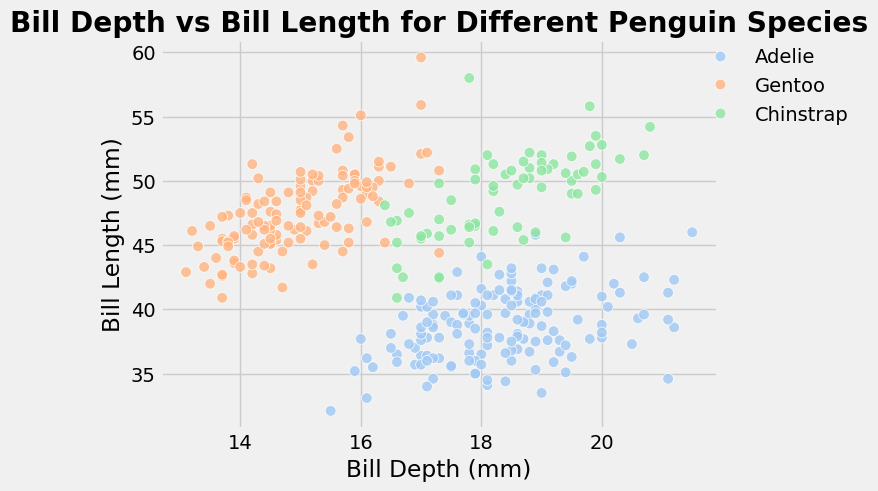

In [ ]:
mpl.style.use('fivethirtyeight')

# Basic scatterplot

p1 = sns.scatterplot(x = 'bill_depth_mm', y = 'bill_length_mm',
                     hue = 'species',
                     # For more seaborn palettes, see https://seaborn.pydata.org/tutorial/color_palettes.html.
                     palette = 'pastel',
                     # Size parameter:
                     s = 60,
                     # Transparency parameter:
                     alpha = 0.8,
                     data = penguins)

p1.set_title('Bill Depth vs Bill Length for Different Penguin Species',
             weight = 'bold')

p1.set(xlabel='Bill Depth (mm)',
       ylabel='Bill Length (mm)')


plt.legend(loc='upper right',
           # Two elements correspond to x and y coordinates:
           bbox_to_anchor= (1.25, 1),
           # Remove legend frame:
           frameon=False,
           borderaxespad=0)

plt.savefig('/drive/My Drive/Python/penguin_fig1.png',
            dpi = 300,
            # Making sure the image isn't cropped!
            bbox_inches='tight')

**Optional**

Below, you'll find supplemental code for modifying scales and formatting axis labels. To run the code, un-annotate the lines in the cell by removing the `#` sign.

In [ ]:
# import matplotlib.pylab as pylab

# params = {'legend.title_fontsize': '15',
#           'legend.fontsize': 'medium',
#           'axes.labelsize': 'large',
#           'axes.titlesize': 'large',
#           'xtick.labelsize': 'medium',
#           'ytick.labelsize': 'medium'}

# pylab.rcParams.update(params)

# p1b = sns.scatterplot(x='bill_depth_mm', y='bill_length_mm', hue='island', data=penguins)

# p1b.set_xscale('log')

### Adding Regression Lines to Scatterplots

The `lmplot` function can be used to visualize linear relationships between variables. It can also map _interactions_ or spotlight conditional relationships (i.e., heterogeneous treatment effects) using faceted grids.

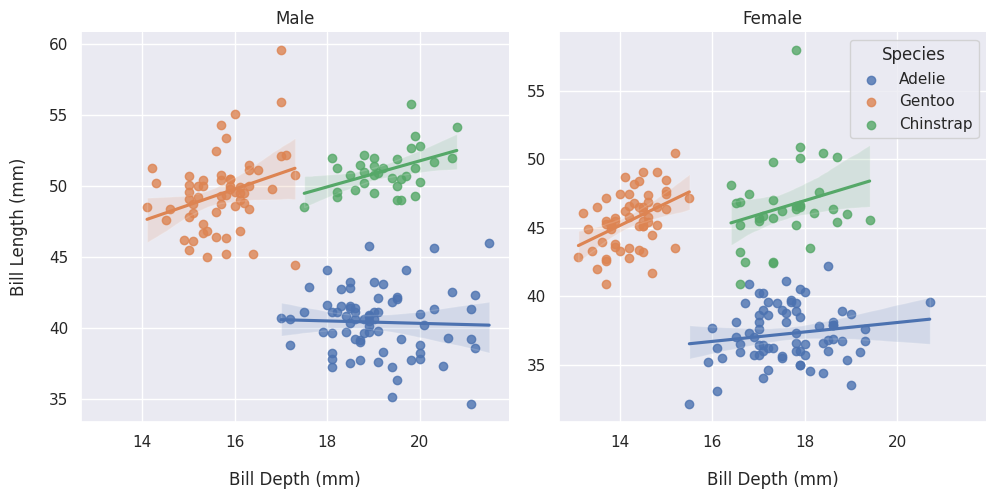

In [ ]:
sns.set_theme()

# Capitalizing sex in the data frame:

penguins.sex = penguins.sex.str.capitalize()

# Setting up the plot:

p2 = sns.lmplot(x = 'bill_depth_mm',
                y = 'bill_length_mm',
                hue = 'species',
                # Unlocks facets/conditional panels:
                col = 'sex',
                # Equivalent to scales = free_y in ggplot:
                facet_kws = {'sharey':False},
                data = penguins)

# Removing the legend automatically generated via lmplot
# (so we can use mpl functions to manipulate our legend instead):

p2._legend.remove()

# Removing the 'variable name =' text from facet panels:

p2.set_titles('{col_name}')

p2.set_axis_labels(x_var='Bill Depth (mm)',
                   y_var='Bill Length (mm)',
                   labelpad = 15)

plt.legend(title='Species')

plt.show()

## Barplots

In the example below, we'll generate a grouped horizontal barplot that maps variation in penguins' body mass _across_ species and illustrates how this variation ebbs and flows as a function of sex.

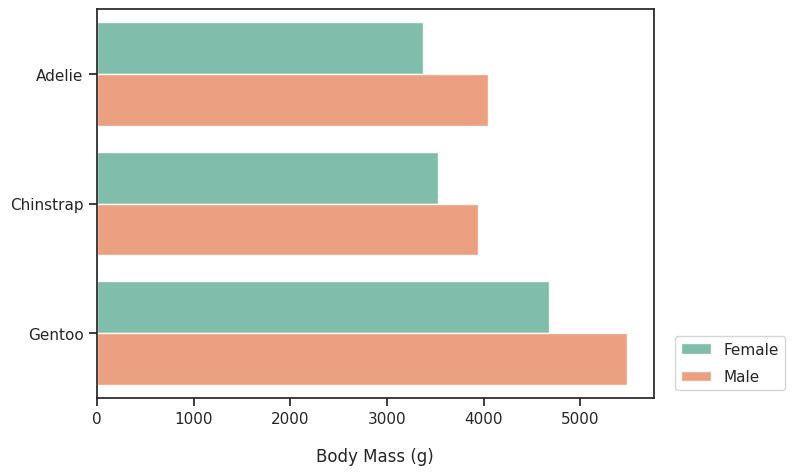

In [ ]:
sns.set(style='ticks', palette='Set2')

# Generating array corresponding to desired (alphabetical) x-axis order:

order_plot = penguins['species'].sort_values().unique()

p3 = sns.barplot(x='body_mass_g', y='species',
                 # To create a grouped bar plot:
                 hue = 'sex',
                 # Removing confidence intervals?
                 errorbar = None,
                 alpha = 0.9,
                 hue_order = ['Female', 'Male'],
                 order = order_plot,
                 data=penguins)

p3.set_xlabel('Body Mass (g)', labelpad = 15)

p3.set_ylabel('',)

plt.legend(loc='lower right',
           bbox_to_anchor = (1.25, 0),
           labelspacing = 0.8)

## Boxplots

Boxplots are can help us visualize distributions---specifically, by highlighting key summary statistics. Just as with barplots, manipulating your `x` and `y` arguments can help you iterate between vertical and horizontal (boxplot) representations of the same underlying data.


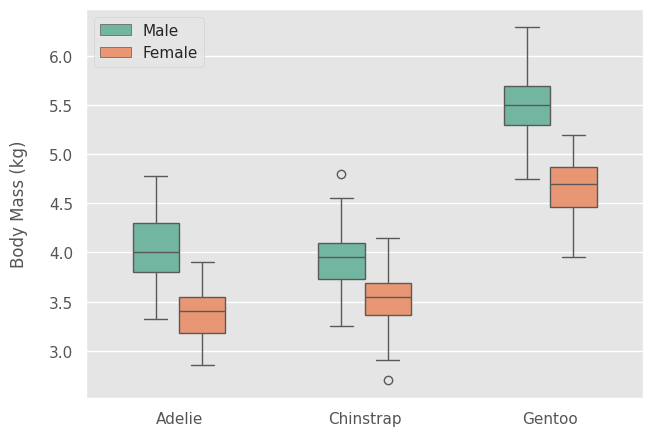

In [ ]:
mpl.style.use('ggplot')

# Changing our body mass measure to kg in lieu of g:

penguins['body_mass_kg'] = penguins.body_mass_g/1000

p4 = sns.boxplot(y='body_mass_kg', x='species', data=penguins,
                 width=0.5,
                 hue = 'sex',
                 palette='Set2',
                 order = order_plot)

p4.set_xlabel('')

p4.set_ylabel('Body Mass (kg)', labelpad = 15)

plt.legend(title = '')
           #oc="upper center")

## Other Ways to Plot Distributions

### Violin Plots

<Axes: xlabel='body_mass_kg', ylabel='species'>

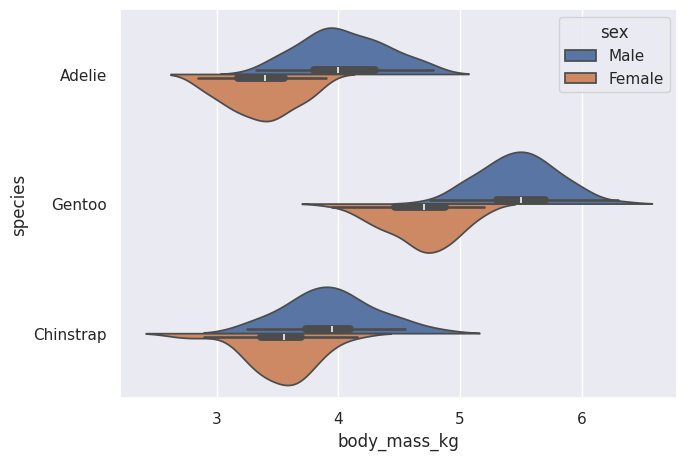

In [ ]:
sns.set_theme()

sns.violinplot(x='body_mass_kg', y='species', hue='sex',
               split = True,
               data=penguins)

### Histograms

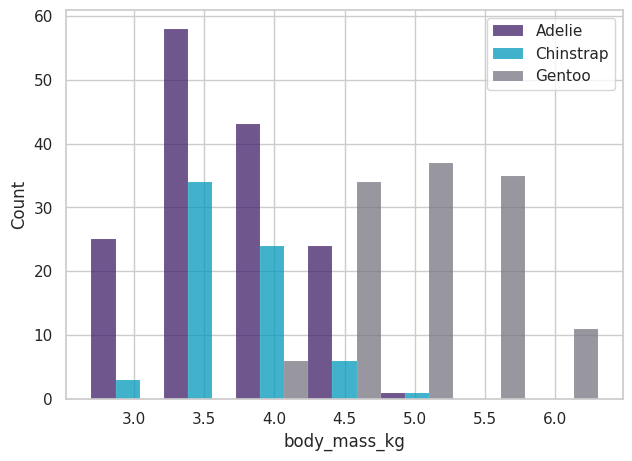

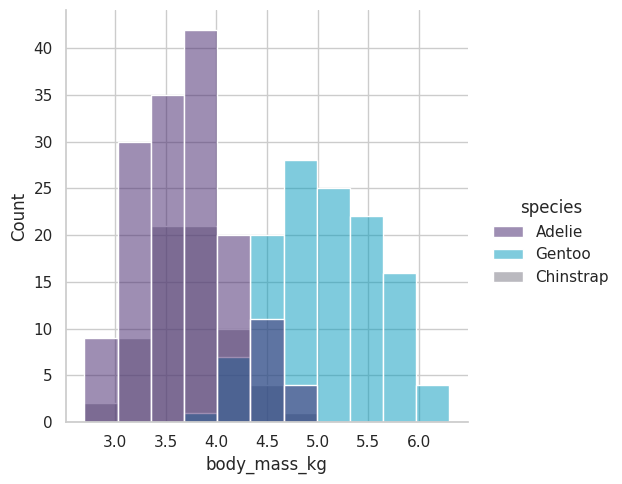

In [ ]:
sns.set_theme(style = 'whitegrid')

manual_cols = ['#3f1f69', '#0099bc', '#767481']

sns.histplot(x='body_mass_kg',
             hue = 'species',
             hue_order = order_plot,
             multiple = 'dodge',
             binwidth=0.5,
             palette = manual_cols,
             linewidth=.05,
             data = penguins)

plt.gca().get_legend().set_title('')

sns.displot(x= 'body_mass_kg',
            hue='species',
            kind='hist',
            multiple='layer',
            palette = manual_cols,
            data = penguins)


### Joint Plots

In [ ]:
mpl.style.use('fivethirtyeight')

joint = (
        sns.jointplot(x = 'body_mass_kg', y = 'bill_length_mm',
                      hue = 'species',
                      palette = manual_cols,
                      s = 80,
                      data = penguins)
        .set_axis_labels(xlabel='Body Mass (kg)',
                         ylabel='Bill Length (mm)',
                         labelpad=15)
        )


plt.legend(title = '',
           loc="lower right",
           bbox_to_anchor= (1.25, -0.25),
           borderaxespad=0)

NameError: name 'manual_cols' is not defined

### Density Plots



In [ ]:
sns.set_theme()

sns.displot(x= 'body_mass_kg',
            hue='species',
            #Kernel Density Estimate
            kind='kde',
            alpha = 0.5,
            # multiple = 'fill',
            fill = True,
            palette = 'pastel',
            data = penguins)


## Visualizing Time-Varying Data

While our `penguins` data frame _does_ have time-varying data, we're limited to three time points:


In [ ]:
# Share of observations by 'year':

penguins['year'].value_counts(normalize=True)

With this in mind, let's briefly return to `gapminder`.

## Line Plots

In [ ]:
# Removing Oceania (few observations):

# gapminder['continent'].value_counts(normalize=True)

gapminder = gapminder.query('continent != "Oceania"')

# Ensuring that continents appear in alphabetical order:

continent_order = np.sort(gapminder['continent'].unique())

# Grouped line plot:

sns.lineplot(x='year', y='lifeExp',
             hue = 'continent',
             hue_order = continent_order,
             data = gapminder)

plt.xlabel('Year', fontsize=13, labelpad = 15)

plt.ylabel('Life Expectancy', fontsize=13, labelpad = 15)


# Facets:

p6 = sns.relplot(x='year', y='lifeExp',
                 col='continent',
                 col_order = continent_order,
                 col_wrap = 2,
                 kind='line',
                 palette='Set2',
                 color = '#AA336A',
                 data = gapminder)

p6.set_titles('{col_name}')

### Heatmaps

To generate a heatmap in `seaborn`, let's modify our input data frame by:

+ Isolating countries in the Americas.
+ Isolating the following variables: `country`, `year` and `lifeExp`.
+ Reshaping our data from long to wide using the `pivot` method.

In [ ]:
# Isolating countries in the Americas:

gapminder_adj = gapminder.query('continent == "Americas"')

# Zeroing-in on variables of interest:

gapminder_adj = gapminder_adj[['country', 'year', 'lifeExp']]

# Pivoting to wide format

gapminder_adj = gapminder_adj.pivot(index = 'country', columns = 'year', values = 'lifeExp')

gapminder_adj.head()

gapminder_adj.reset_index().melt(id_vars='country',
                                 var_name='year',
                                 value_name='lifeExp')

With these modifications in place, let's generate a quick heatmap that captures how life expectancy in the Americas has changed over time:

In [ ]:
mpl.style.use('fivethirtyeight')

p5 = sns.heatmap(gapminder_adj,
                 linewidths =0.5,
                 # Includes all y-tick labels:
                 yticklabels=True,
                 square=True,
                 cbar_kws= {"orientation": "horizontal",
                            "shrink": 0.2,
                            "aspect": 10,
                            "pad": 0.08})

# Rotates x-axis labels (to enhance legibility):

plt.xticks(rotation=30)

p5.set(xlabel='',
       ylabel='')

p5.set_title('Life Expectancy in the Americas',
             size = 18,
             weight = 'bold',
             pad = 15)

# p5.collections[0].colorbar.set_label('Life Expectancy (Years)', size = 15, labelpad=10)

# Changing the plot's dimensions:

plt.gcf().set_size_inches(22, 12)

plt.savefig('/drive/My Drive/Colab Notebooks/Plots/gapminder_heatmap.png',
            bbox_inches='tight', dpi = 350)

# `seaborn`'s Object Interface

In September of 2022, `seaborn`'s developers introduced a new [`seaborn.objects`](https://seaborn.pydata.org/tutorial/objects_interface.html) interface to bring the *grammar of graphics* into the `seaborn` ecosystem. However, `seaborn.objects` is still in its infancy.

In the sections below, we'll quickly touch on how to generate scatterplots, barplots and line plots using this new interface. As you work your way down the next few sections of this notebook, make sure to un-annotate lines of code to add _layers_ to your plot objects.

## Scatterplots

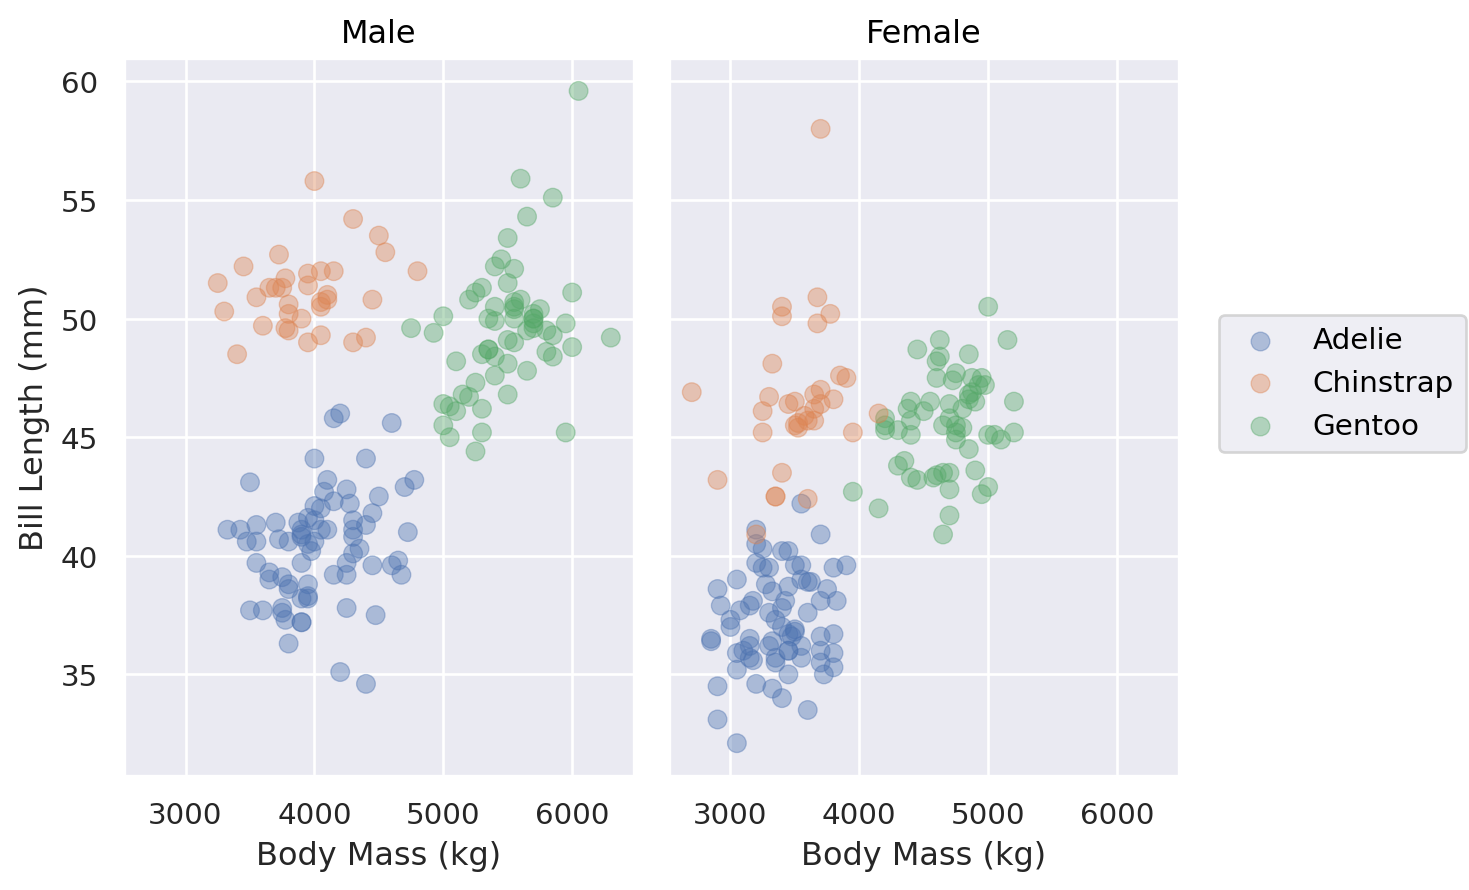

In [ ]:
(
    so.Plot(penguins, x = 'body_mass_g', y = 'bill_length_mm', color = 'species')
    #.add(so.Dot(alpha = 0.4, pointsize=7))
    #.label(x='Body Mass (kg)', y='Bill Length (mm)', color='')
    #.scale(color=so.Nominal(order = ['Adelie', 'Chinstrap', 'Gentoo']))
    #.facet('sex').label(title=str.capitalize)
    #.share(x=True, y = False)
    #.add(so.Line(linewidth=3.5, alpha =0.8), so.PolyFit())
    #.layout(size=(10, 5)) #width, height
    #.save('/drive/My Drive/Colab Notebooks/Plots/penguin_fig2.png', bbox_inches='tight', dpi = 300)
)

## Barplots

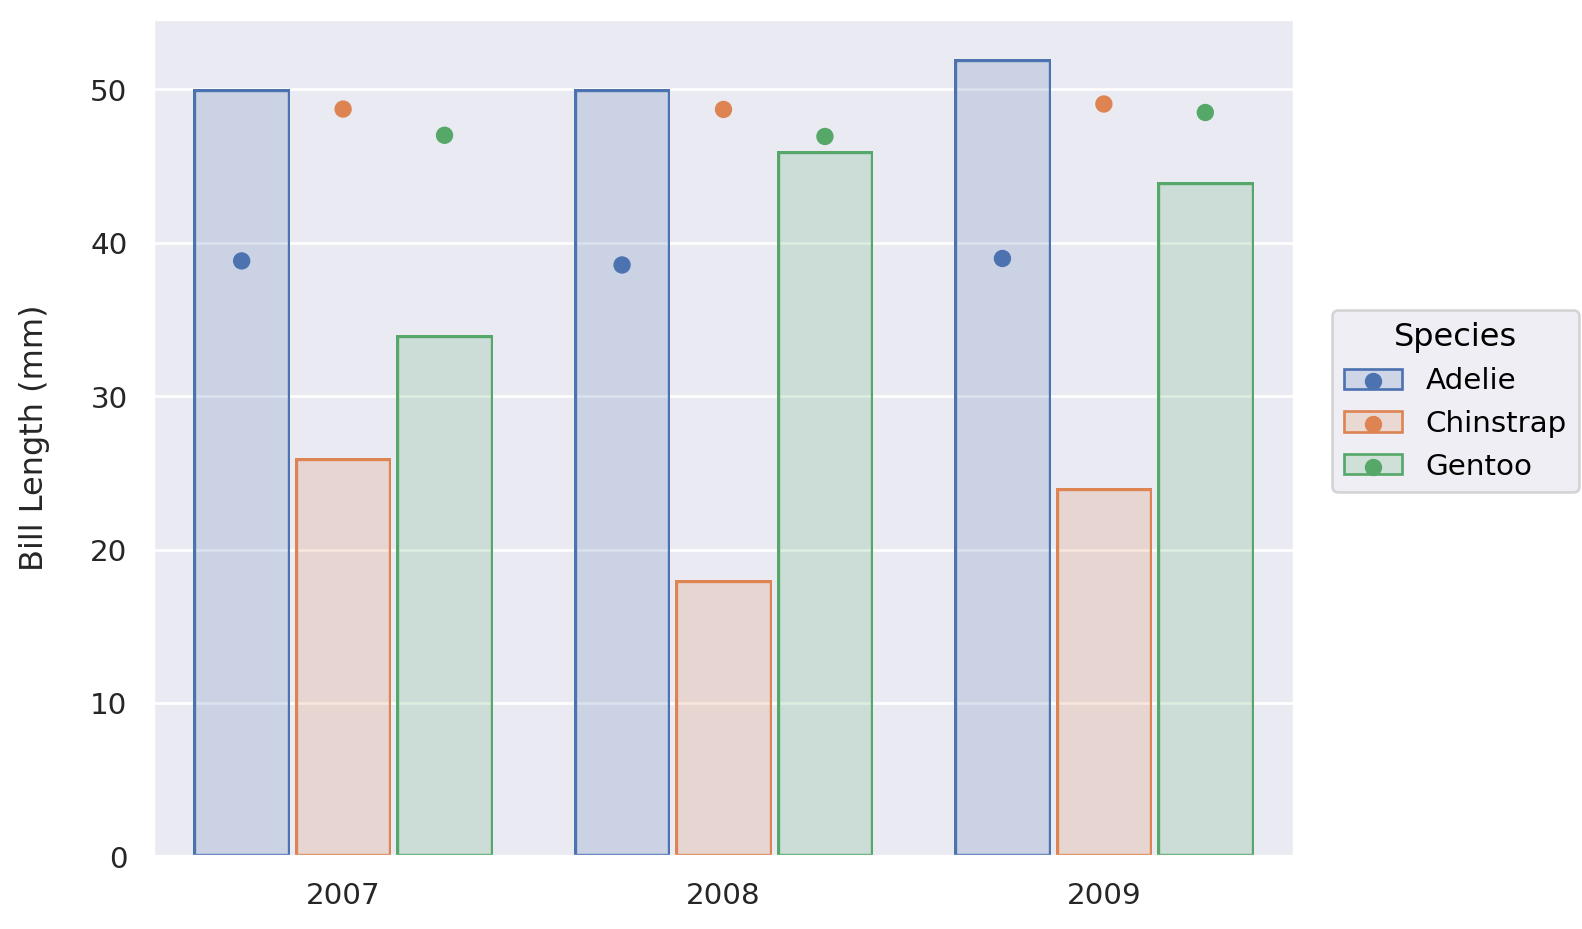

In [ ]:
order_plot = penguins['species'].sort_values().unique()

(
     so.Plot(penguins, 'year', color='species')
     #.scale(x=so.Nominal(), color=so.Nominal(order=order_plot))
     #.add(so.Bar(alpha = 0.2), so.Count(), so.Dodge(gap = 0.05))
     #.add(so.Dot(), so.Agg(func='mean'), so.Dodge(gap = 0.05),
     #     y='bill_length_mm')
     #.label(x='', y = 'Bill Length (mm)', color=str.capitalize)
     #.theme({ "axes.labelpad": 15 })
     #.layout(size=(7, 5))
)

## Line Plots

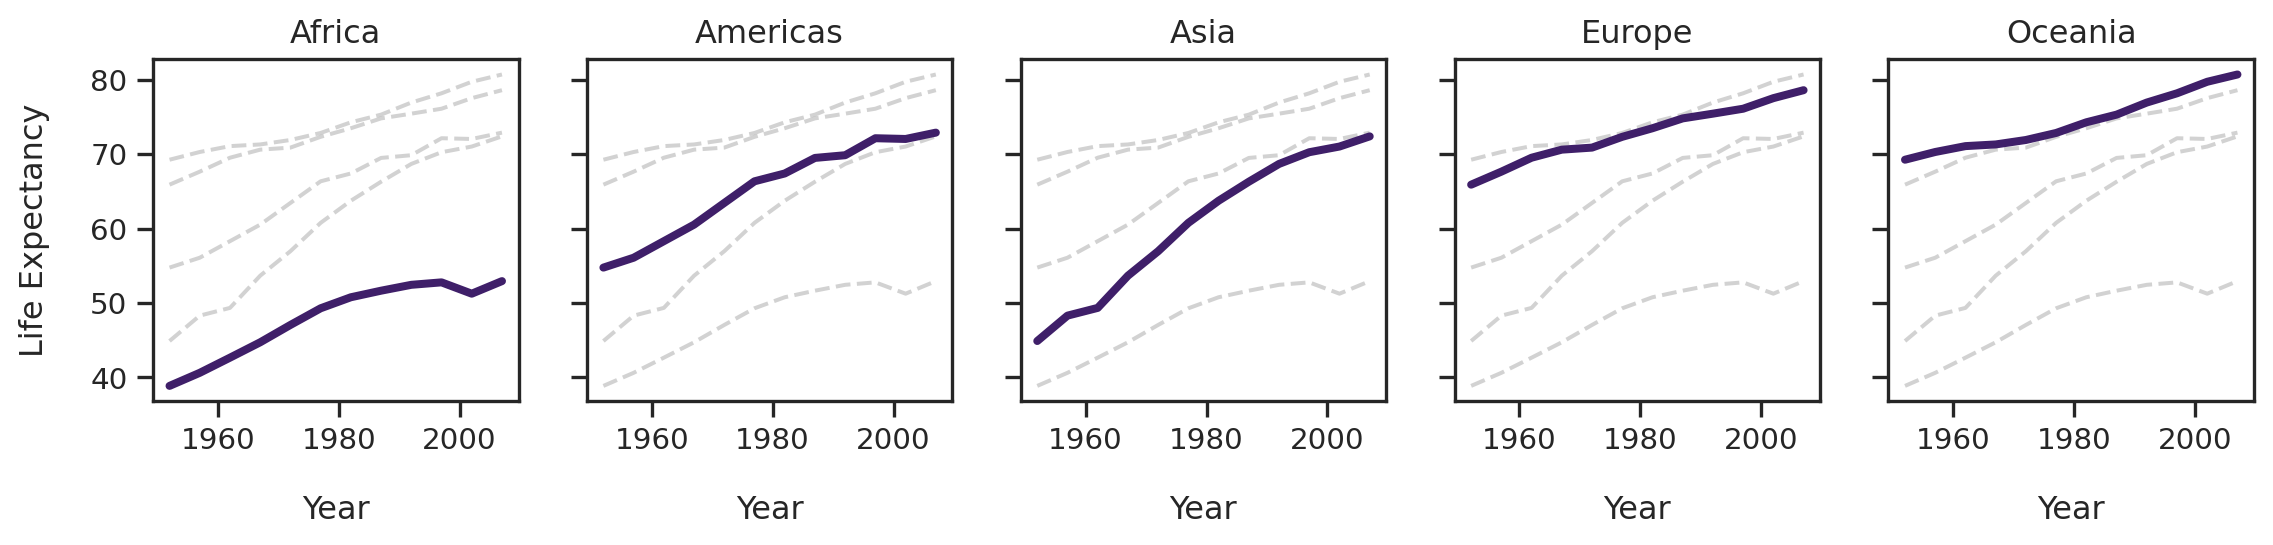

In [ ]:
from seaborn import axes_style

continent_order = gapminder['continent'].dropna().sort_values().unique()

(
    so.Plot(gapminder, x='year', y='lifeExp')
    #.facet('continent', wrap = 6, order = continent_order)
    #.add(so.Line(alpha=.35, color = 'grey', linestyle = '--'), so.Agg('median'), group='continent', col=None)
    #.add(so.Line(color = '#3f1f69', linewidth = 3), so.Agg('median'))
    #.label(y = 'Life Expectancy', x = str.capitalize)
    #.theme({**axes_style('ticks'), "axes.labelpad": 15})
    #.layout(size=(12, 3))

)